In [22]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

2.7.0


The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉
|Label|Description|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

This dataset is available directly in the `tf.keras.datasets` API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0  88  51  18  22  98  81   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6  68 107 225 172  90 120 182 155 112  72  15   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  69 115 144 148 113 111 160 248 255 143 103 124 146 151 132  84   0   0   0   0   0   0]
 [  0   0   0   0   0 102 122 116 110  99 112 102  64 139 117  77 119 111 107 110 115 122 124   0   0   0   0   0]
 [  0   0   0   0  33 146 102 108 115 106 104 115 120 113  97 116 106 102 106 106 107 106 138  37   0   0   0   0]
 [  0   0   0   0  80 138 110 107 111 104 111 106 107 143 117 103 115 124 115 103 104 107 134  71   0   0   0   0]
 [  0   0   0   0 112 115 138 103 107 110 107 106 107 132 107 110 146 128 137 107 103 122 128 110   0   0   0   0]
 [  0   0   0   6 129 104 120 157  93 108 111 108 112 120 104 115 142  94 128  99  98 143 110 124   0   0   0   0]
 [  0   0   0  67 135 110 124 177  91 107 106 100 

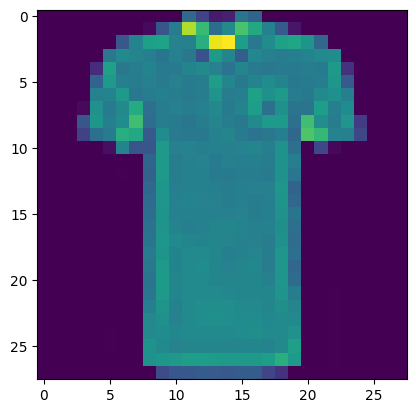

In [16]:
# Visualize your data
index = random.choice(range(59999)) # You can put between 0 to 59999 here

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [17]:
# Normalize the pixel values of the train and test images
training_images = training_images/255.0
test_images = test_images/255.0

In [21]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [23]:
# Declare sampleinputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


# references

[Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

[Sequential](https://keras.io/api/models/sequential/)

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)

[Dense](https://keras.io/api/layers/core_layers/dense/)

[ReLU](https://keras.io/api/layers/activations/#relu-function)

[Softmax](https://keras.io/api/layers/activations/#softmax-function)